PROBLEM STATEMENT


 The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

Importing the Libraries


 We start off this project by importing all the necessary
 libraries that will be required for the process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data


 Loading the data and removing unnecessary column from the dataframe

In [3]:
df = pd.read_csv('/content/Flight_Booking.csv')

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.shape

(300153, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Missing Values

Checking out the missing values in a dataframe

In [12]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


Data Visualization

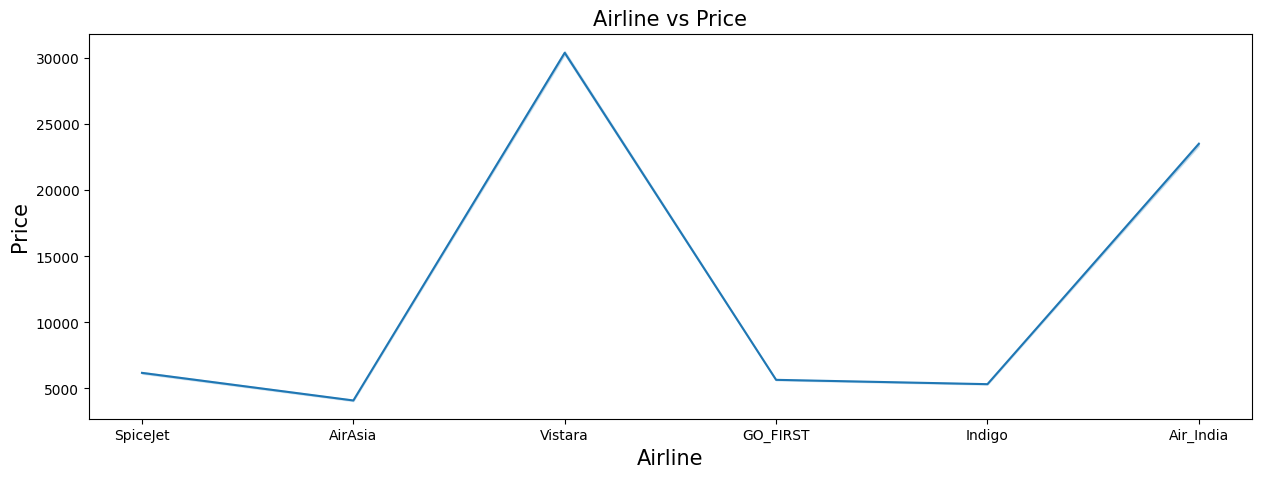

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airline vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

There is a variation in price with
different airlines

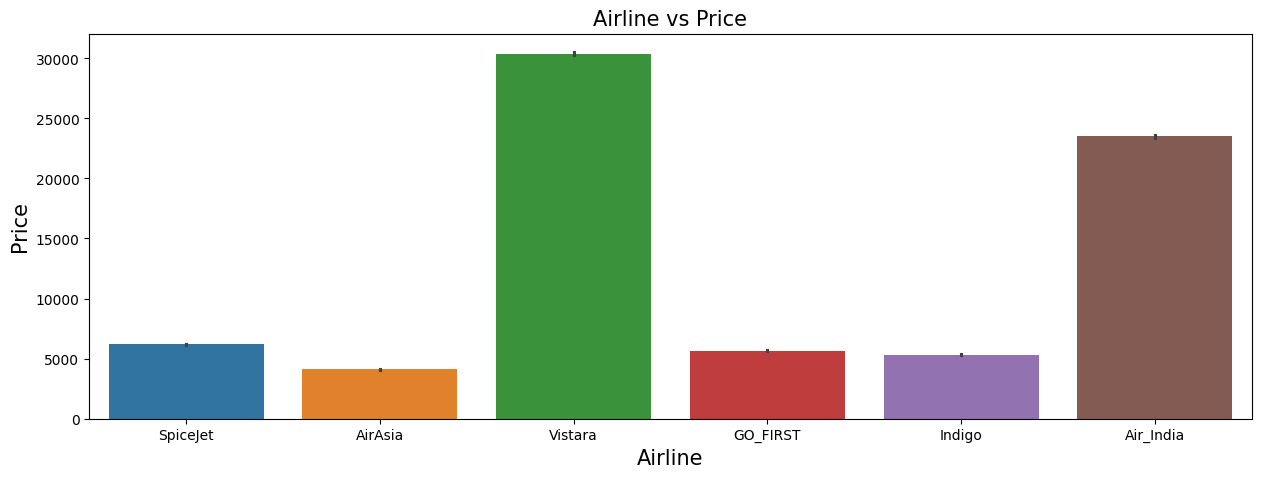

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='airline', y='price', data=df, hue = 'airline')
plt.title('Airline vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

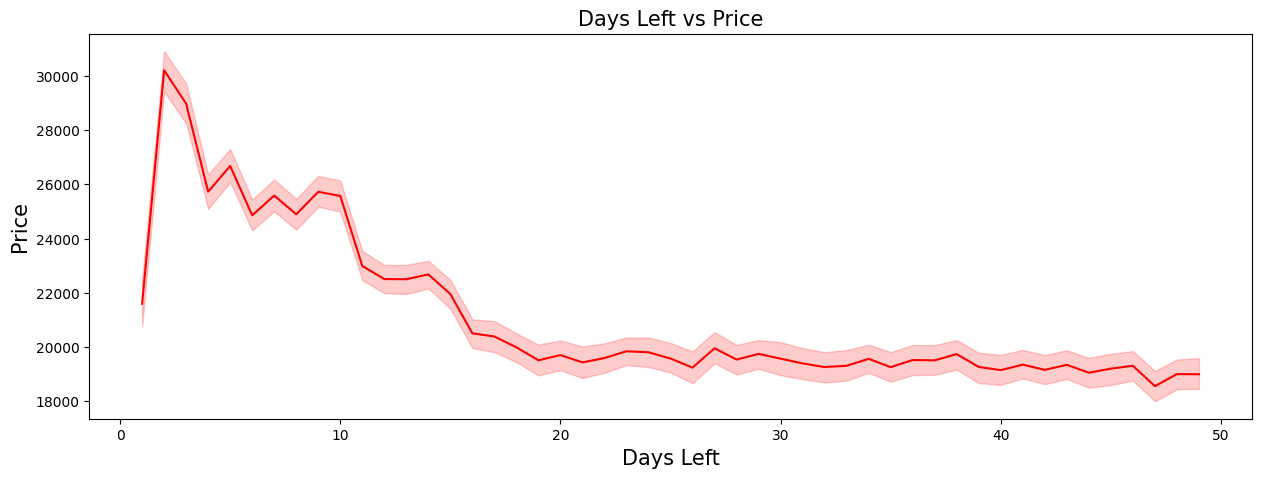

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x='days_left', y='price', data=df, color = 'red')
plt.title('Days Left vs Price', fontsize = 15)
plt.xlabel('Days Left', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

The price of the ticket
increases as the days left for
departure decreases

Range of price of all the
flights of Economy and
Business class

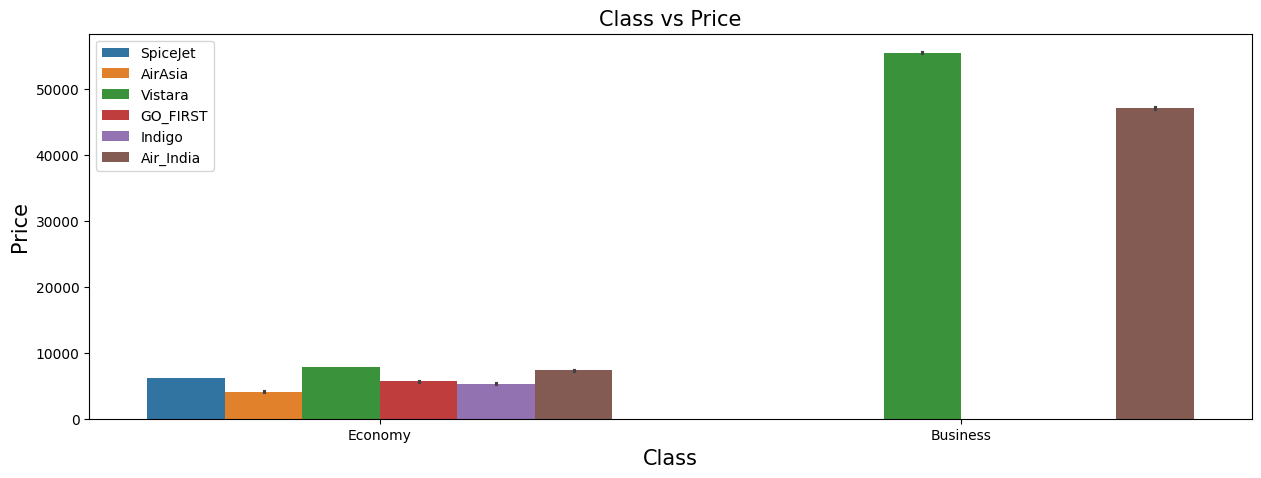

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='class', y='price', data=df, hue = 'airline')
plt.title('Class vs Price', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

plt.legend()

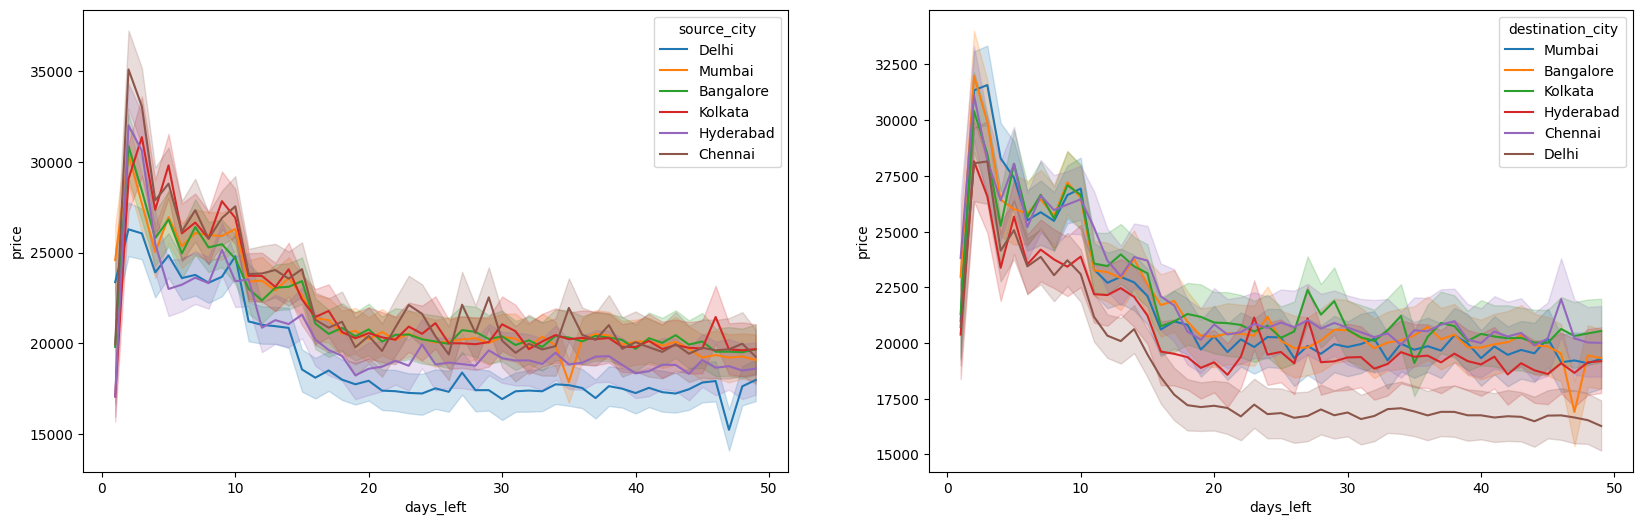

In [31]:
fig,ax=plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x= 'days_left',y= 'price',data=df, hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price', data=df, hue= 'destination_city',ax=ax[1])
plt.show()

** Visualization of categorical features with countplot**

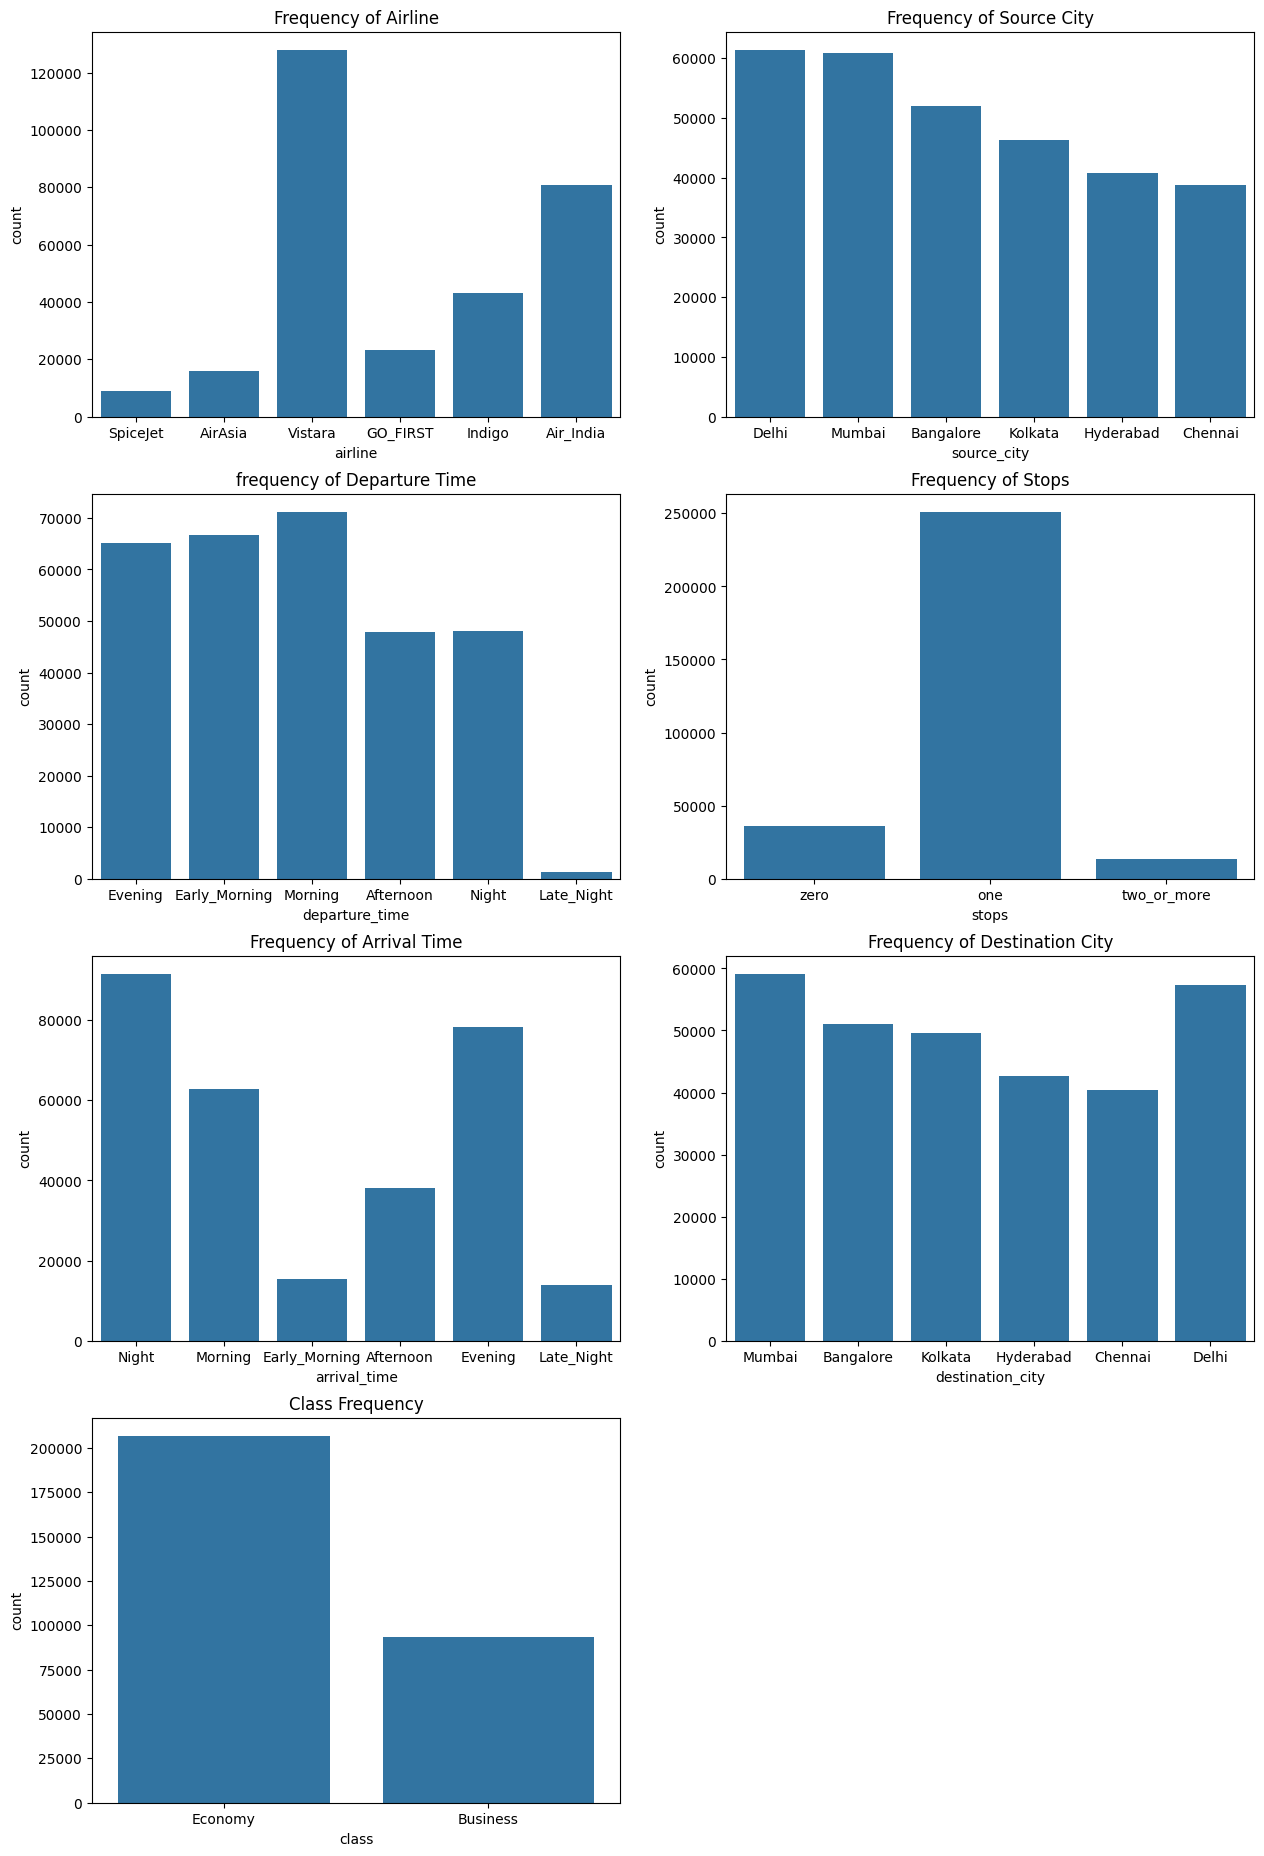

In [41]:
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")
plt.show()

Label Encoding


 Performing One Hot Encoding for categorical features of a
dataframe

In [45]:
from sklearn. preprocessing import LabelEncoder
le=LabelEncoder()
df[ "airline"]=le.fit_transform(df["airline"])
df["source_city" ]=le.fit_transform(df["source_city"])
df["departure_time" ]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df ["stops" ])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


FEATURE SELECTION

Plotting the correlation
graph to see the
correlation between
features and dependent
variable.

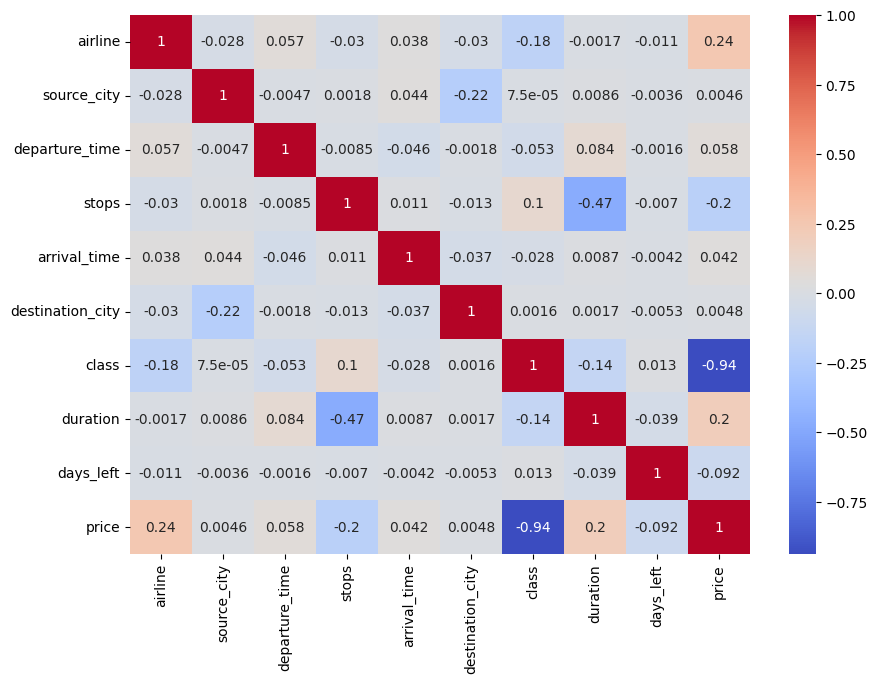

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('flight', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [49]:
from statsmodels. stats. outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!= 'object') & (col!= 'price')):
      col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame ()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns) )]
print (vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


 Selecting the features using
VIF. VIF should be less than 5.
So drop the stops feature

In [50]:
df = df.drop(columns=['stops'])

In [51]:
from statsmodels. stats. outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!= 'object') & (col!= 'price')):
      col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame ()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns) )]
print (vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


Linear Regression


 Applying standardization and implementing Linear Regression Model to
predict the price of a flight

In [52]:
x = df.drop(columns=['price'])
y = df['price']
from sklearn. model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc. transform(x_test)
from sklearn. linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

difference=pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual._Value", "Predicted_Value"])
difference

,Actual._Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066




Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7259.93 and Mean absolute percentage
error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.897752737512321

In [56]:

from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error


4468.426673542113

In [57]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error


52706651.33334208

In [58]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)



0.34765804610681816

In [59]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

np.float64(7259.934664536733)

Plotting the graph of actual
and predicted price of flight

/tmp/ipython-input-1002578086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual Values')
/tmp/ipython-input-1002578086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted Values')


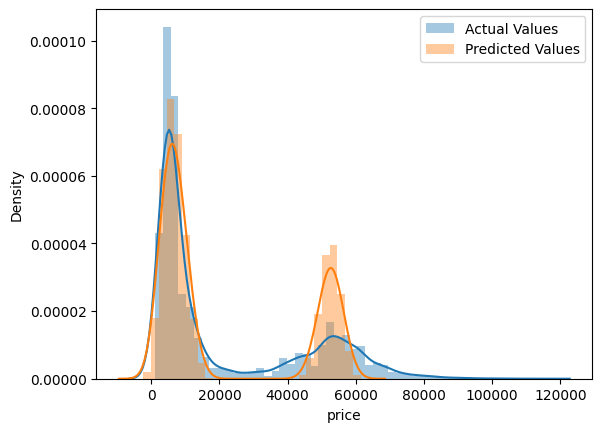

In [63]:
sns.distplot(y_test, label = 'Actual Values')
sns.distplot(y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

Decision Tree Regressor



In [65]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train, y_train)
y_pred = dr.predict(x_test)
y_pred

array([ 7366., 72783.,  6195., ...,  6314.,  5082., 66122.])

In [66]:
r2_score(y_test, y_pred)

0.974557903360634

In [67]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mean_abs_error)

Mean Absolute Error: 1218.9462027952225


In [68]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07748869831256153

In [69]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mean_sq_error)

Mean Squared Error: 13114949.82001938


In [70]:
root_mean_sq_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_sq_error)

Root Mean Squared Error: 3621.4568643046655


/tmp/ipython-input-1002578086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual Values')
/tmp/ipython-input-1002578086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted Values')


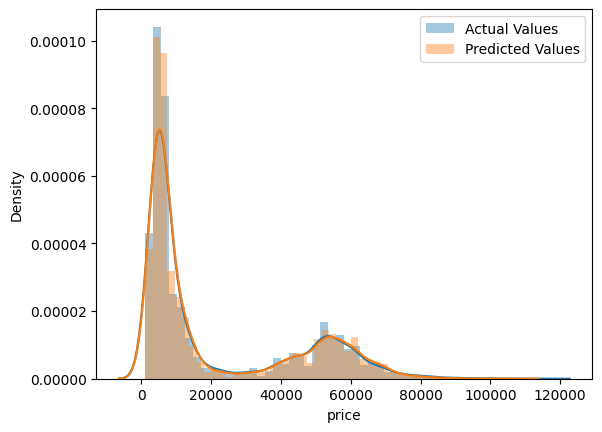

In [74]:
sns.distplot(y_test, label = 'Actual Values')
sns.distplot(y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

Mean absolute percentage
error is 7.7 percent and RMSE
is 3620 which is less than the
linear regression model

Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred

array([ 6061.79, 70414.09,  6195.  , ...,  6474.39,  4318.97, 67723.98])

In [73]:
r2_score(y_test, y_pred)

0.9844228079798626

In [77]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mean_sq_error)
root_mean_sq_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_sq_error)

Mean Absolute Error: 1126.3687078104883
0.07354621297817826
Mean Squared Error: 8029766.358359346
Root Mean Squared Error: 2833.6842375888223


/tmp/ipython-input-1002578086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual Values')
/tmp/ipython-input-1002578086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted Values')


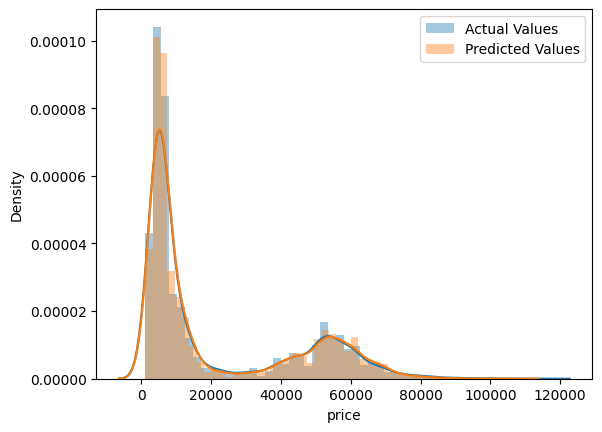

In [76]:
sns.distplot(y_test, label = 'Actual Values')
sns.distplot(y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

 Mean absolute percentage
error is  7.3 percent and RMSE
is 2824 which is less than the
linear regression and decision
tree mode